### Necessary Libraries and Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [60]:
df1=pd.read_csv("C:\\Users\\Shrutee\\Desktop\\MachineLearning\\Kenneth_CTAnalysis\\CT Ananlysis.csv")

In [61]:
df1.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,16,82
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,16,82
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,20,97
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,35,101
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,46,101


### Random Forest Regressor

Without _CT_SIGNAL_TO_DOCK Feature

In [7]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [79]:
df2=df1.copy()

cat_features=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup','RegionType', 'IsMainstream', 
              'NewRegionFlag', 'NewDCFlag', 'PlanIntentName', 'IsNPI']
      
df2[cat_features] = df1[cat_features].apply(le.fit_transform)

In [80]:
df2.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,8,3,22,0,1,1,0,0,2,0,0,3,1,16,82
1,8,3,28,0,0,1,0,0,2,0,0,3,1,16,82
2,8,3,69,0,0,1,0,0,2,0,0,3,1,20,97
3,8,3,69,0,0,1,0,0,2,0,0,3,1,35,101
4,8,3,40,0,0,1,0,0,2,0,0,4,1,46,101


In [81]:
#lets define our predictors and outcome (Target)
x=df2.drop(["_CT_SIGNAL_TO_LIVE","_CT_SIGNAL_TO_DOCK"],axis=1)
y=df2["_CT_SIGNAL_TO_LIVE"]

In [82]:
#Lest split our data into Training and testing sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)

In [83]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(criterion='mse', max_depth= None, n_estimators=300)

In [84]:
# Lets fit out data to the model
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
# Lets do predictions on out test data
pred=RFR.predict(x_test)

In [86]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [87]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [89]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 64.12540476080869
MAE: 45.0776768555641
r_square: 0.4978630646064899


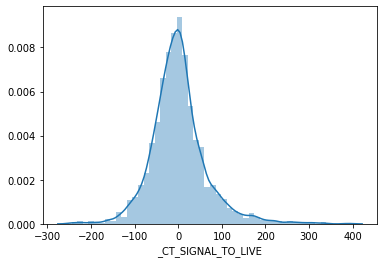

In [90]:
#Lets See if our error are normally distributed or not 
sns.distplot(y_test-pred)

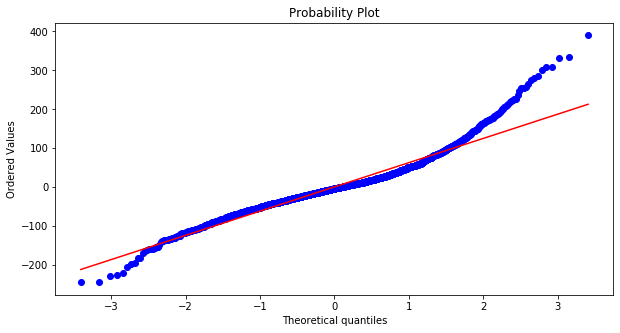

In [91]:
# Lets verify the distribution on Q-Q plot as well

import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-pred, dist="norm", plot=pylab)
pylab.show()

In [92]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

In [93]:
for feature in zip (x.columns, importances):
    print (feature)

('EngineeringGroup', 0.24788073273050076)
('PlanResourceTypeName', 0.16229569158311152)
('Region', 0.19228313400977265)
('RegionGroup', 0.012299041668343863)
('RegionType', 0.03679375646756294)
('IsMainstream', 0.10043209204669427)
('NewRegionFlag', 0.008215479165899526)
('NewDCFlag', 0.012172179767236389)
('PlanIntentName', 0.041699425701648675)
('IsNPI', 0.01099470832101852)
('NewTechFlag', 0.0161497509937134)
('DeploymentSeverity', 0.048947490138408434)
('NumberOfRacks', 0.10983651740608881)


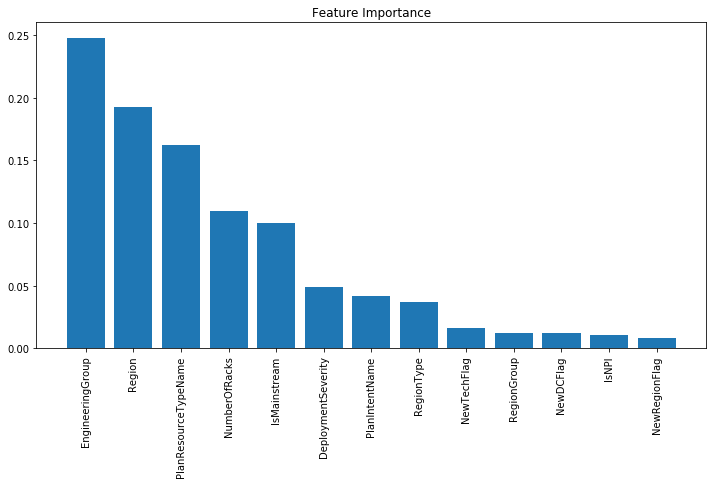

In [94]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

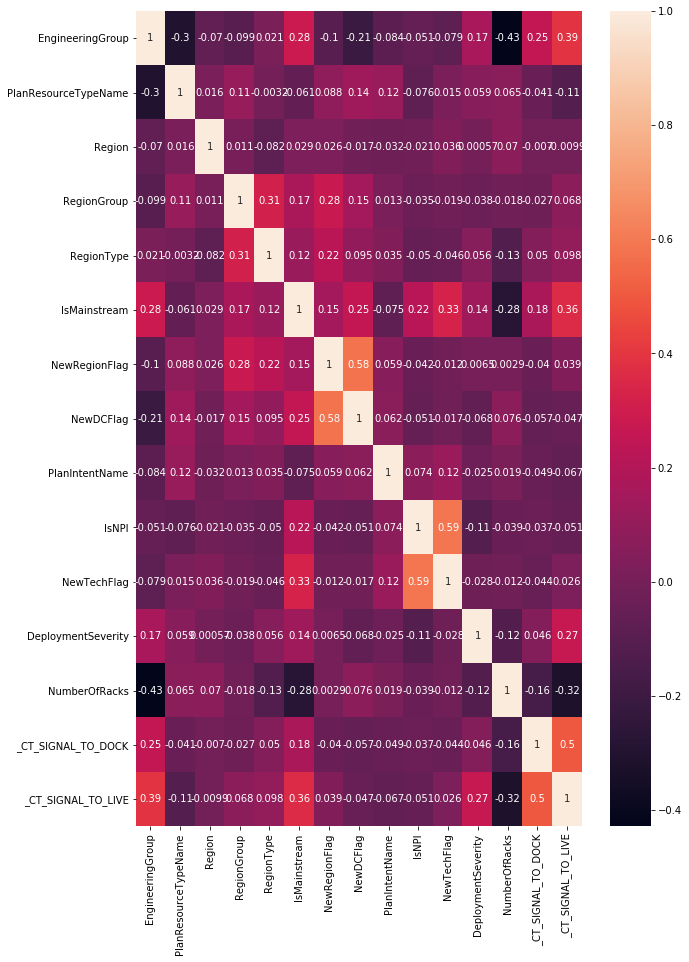

In [98]:
plt.figure(figsize = (10,15))
sns.heatmap(df2.corr(),annot = True)

### Lets make a comparisions with diffrent regression models

In [78]:
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.005,0.05,0.5,1,1.5,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'n_estimators': [100,200,300]
                
    
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=100)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.272230,{'normalize': False}
1,lasso,0.272375,"{'alpha': 0.05, 'selection': 'cyclic'}"
2,decision_tree,0.315783,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.464660,"{'criterion': 'friedman_mse', 'n_estimators': ..."


In [54]:
df3=df1.copy()

#Lets see how the data distribusion looks like if we do logarithmic transformation
df3["_CT_SIGNAL_TO_LIVE"]=np.log(df3["_CT_SIGNAL_TO_LIVE"])
df3["_CT_SIGNAL_TO_DOCK"]=np.log(df3["_CT_SIGNAL_TO_DOCK"]+1)

In [49]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df1[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

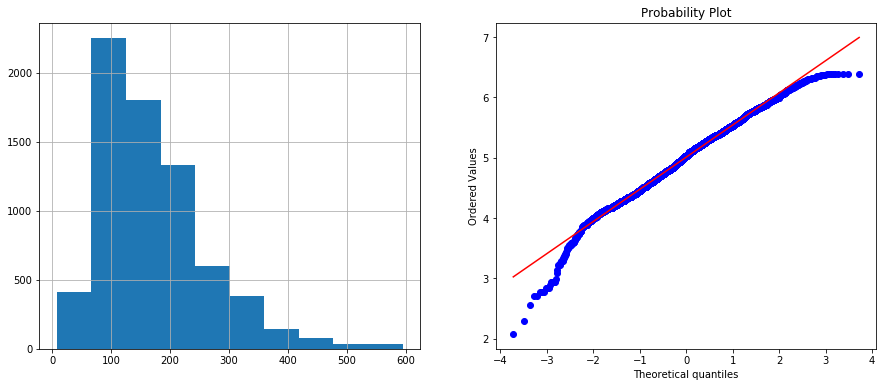

In [50]:
diagnostic_plots(df3, "_CT_SIGNAL_TO_LIVE")

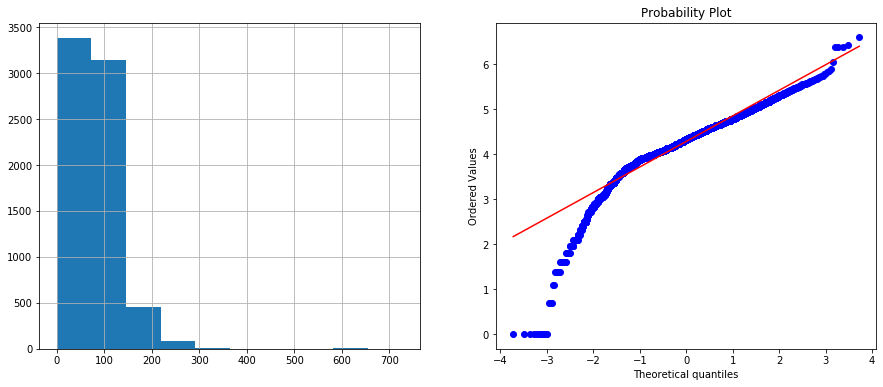

In [58]:
diagnostic_plots(df3, "_CT_SIGNAL_TO_DOCK")

In [ ]:
# Logarithmic Transformation does not make much diffrence in the distribusion 

In [59]:
df3.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,2.833213,4.406719
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,2.833213,4.406719
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,3.044522,4.574711
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,3.583519,4.615121
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,3.850148,4.615121
